In [1]:
import json
from triplea.config.settings import SETTINGS,ROOT
import networkx as nx
import matplotlib.pyplot as plt
import triplea.service.graph.export.export as gexport
import triplea.service.graph.analysis.ganalysis as ganaliz

In [2]:
f = open(ROOT.parent / 'datasets'  / 'sample-graphdict.json')
data = json.load(f)
f.close() 

Create Graph in NetworkX

In [3]:
G = gexport.export_networkx_from_graphdict(data,graph_type='directed')
print(f'Nodes : {G.number_of_nodes()}')
print(f'Edges : {G.number_of_edges()}')

Nodes : 6063
Edges : 29370


remove low degree node

In [4]:
# print(f'Nodes : {G.number_of_nodes()}')
# print(f'Edges : {G.number_of_edges()}')
# for node , d in list(G.degree()):
#     if d < 3:
#         G.remove_node(node)

for node , d in list(G.nodes(data=True)):
    a = G.degree(node)
    node_type = d['Type']
    if node_type == 'Keyword' and a < 3:
        G.remove_node(node)
        print(f' {node}  {node_type} {a}')



        
print(f'Nodes : {G.number_of_nodes()}')
print(f'Edges : {G.number_of_edges()}')

 Anti-HER2 therapy  Keyword 1
 HER2-positive lobular carcinoma  Keyword 1
 ERBB2 protein  Keyword 1
 Neoplasm metastasis  Keyword 2
 Hormone antagonists  Keyword 1
 5-year relative survival  Keyword 2
 period analysis  Keyword 1
 timely evaluation  Keyword 1
 Local recurrence  Keyword 1
 Positive lymph node  Keyword 1
 Tumor growth  Keyword 1
 Inflammatory Breast Cancer  Keyword 1
 Puerto Rico Central Cancer Registry  Keyword 1
 Tumor concordance  Keyword 1
 Clinical decision support tool  Keyword 1
 Computational text analysis  Keyword 1
 Decisional satisfaction  Keyword 1
 Shared decision-making  Keyword 1
 Public health surveillance  Keyword 2
 Electrons  Keyword 1
 Accelerated partial breast irradiation (APBI)  Keyword 1
 Early stage breast cancer  Keyword 1
 Intraoperative electron radiotherapy (IOERT)  Keyword 1
 Local invasive recurrence  Keyword 1
 Systemic adjuvant therapies  Keyword 1
 Incidental findings  Keyword 1
 Research results  Keyword 1
 Return of results  Keyword 1
 

remove custom node

In [5]:
G.remove_node('Humans')
G.remove_node('Female')
G.remove_node('Aged')
G.remove_node('Adult')
G.remove_node('Middle Aged')
G.remove_node('Aged, 80 and over')
G.remove_node('Male')
G.remove_node('Young Adult')
G.remove_node('Retrospective Studies')
G.remove_node('United States')
G.remove_node('Follow-Up Studies')
G.remove_node('SEER Program')
G.remove_node('Cohort Studies')
G.remove_node('Prospective Studies')

show top 5 degree

In [6]:
dcs = ganaliz.sorted_degree_centrality(G)
dcs = dcs.nlargest(n=30, keep='first')
print(dcs)

print(f'Nodes : {G.number_of_nodes()}')
print(f'Edges : {G.number_of_edges()}')

Breast Neoplasms                      0.625809
Registries                            0.312904
Prognosis                             0.108614
Incidence                             0.089547
Neoplasm Staging                      0.086142
Databases, Factual                    0.084780
Risk Factors                          0.082397
Mammography                           0.079333
Breast cancer                         0.072182
Survival Rate                         0.059244
Algorithms                            0.056520
Age Factors                           0.051413
breast cancer                         0.047668
Survival Analysis                     0.045965
Reproducibility of Results            0.045965
Early Detection of Cancer             0.043241
Mass Screening                        0.041199
Neoplasms                             0.040518
Treatment Outcome                     0.039837
Decision Support Systems, Clinical    0.039496
Receptor, ErbB-2                      0.039496
Receptors, Es

In [ ]:
# def filter_node(n1):    
#     return n1 != 5

# for n,data in list(G.nodes.data()):
#     print(data)

# G1 = nx.subgraph_view(G, filter_node = filter_node)
# nx.draw(G1)
# plt.show()

# print(f'Nodes : {G1.number_of_nodes()}')
# print(f'Edges : {G1.number_of_edges()}')

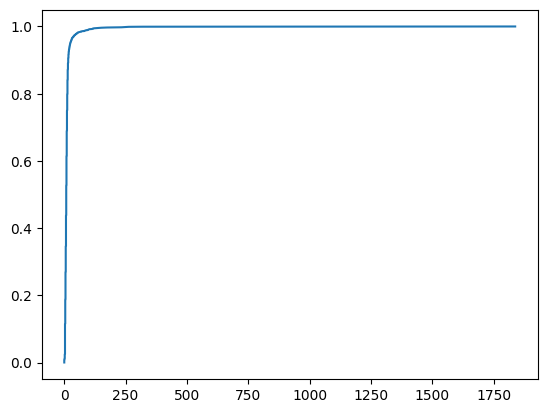

12.131381892443839

In [7]:
ganaliz.show_degree_distribution(G)
ganaliz.average_neighbor_number(G)

Export degree distribution data to csv

In [13]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML

def ecdf(data):
    return np.sort(data), np.arange(1, len(data) + 1) / len(data)

x, y = ecdf(pd.Series(dict(nx.degree(G))))

# print(len(x))
# print(len(y))

# for i in range (0,len(x)):
#     a = x[i]
#     b = y[i]
#     print(f' {a} , {b}')

data = {
  "x": x,
  "y": y
}

df = pd.DataFrame(data)


display(df)
df.to_csv('degree_distribution.csv', index=False)

,x,y
0,0,0.000340
1,0,0.000681
2,0,0.001021
3,0,0.001361
4,0,0.001702
...,...,...
2933,253,0.998639
2934,263,0.998979
2935,319,0.999319
2936,919,0.999660


In [8]:
H = G.to_undirected()
i = 0
sum_neighbors = 0
for n, d in list(H.nodes(data=True)):
    print(d)
    
    
    node= n
    iter = H.neighbors(node)
    num_neighbors = len(list(iter))
    sum_neighbors = sum_neighbors + num_neighbors
    # G.nodes[n]['neighbor'] = num_neighbors
    node_type = d['Type']
    if num_neighbors == 0:
        if node_type == 'Keyword':
            print(f'{node} {num_neighbors}')
        else:
            i = i + 1
            G.remove_node(node)
            print(f'del {node} {num_neighbors}')

print(f'{i} node deleted.')

{'Type': 'Article', 'Name': '36715845'}
{'Type': 'Keyword', 'Name': 'Breast cancer'}
{'Type': 'Keyword', 'Name': 'Registry'}
{'Type': 'Keyword', 'Name': 'Survival'}
{'Type': 'Article', 'Name': '36635428'}
{'Type': 'Keyword', 'Name': 'Breast neoplasms'}
{'Type': 'Keyword', 'Name': 'Pertuzumab'}
{'Type': 'Keyword', 'Name': 'Registries'}
{'Type': 'Keyword', 'Name': 'Treatment Outcome'}
{'Type': 'Article', 'Name': '36601341'}
{'Type': 'Keyword', 'Name': 'Drug therapy'}
{'Type': 'Keyword', 'Name': 'Estrogen receptor'}
{'Type': 'Keyword', 'Name': 'Prognosis'}
{'Type': 'Article', 'Name': '36578940'}
{'Type': 'Keyword', 'Name': 'breast cancer'}
{'Type': 'Keyword', 'Name': 'cancer registry'}
{'Type': 'Article', 'Name': '36538148'}
{'Type': 'Keyword', 'Name': 'Adjuvant treatment'}
{'Type': 'Keyword', 'Name': 'Metastasis'}
{'Type': 'Article', 'Name': '36484906'}
del 36484906 0
{'Type': 'Article', 'Name': '36484009'}
{'Type': 'Keyword', 'Name': 'Epidemiology'}
{'Type': 'Article', 'Name': '36476612

In [9]:
f = ROOT.parent / 'datasets'  / 'jupyter'
gexport.export_graphml_from_networkx(G,str(f))

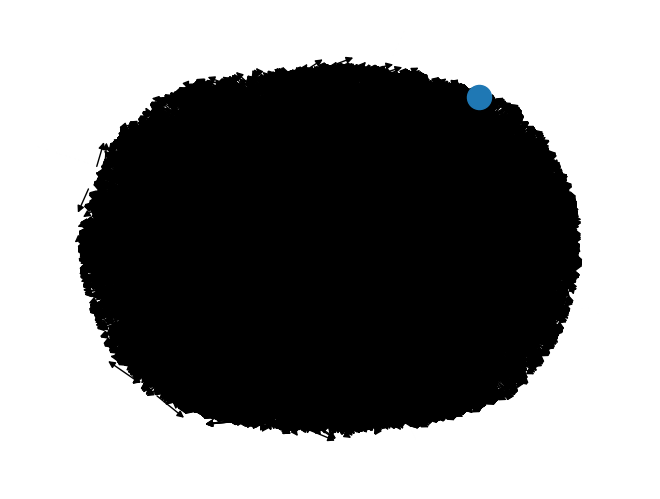

In [90]:
# d = dict(G.degree)

# nx.draw(G, nodelist=d.keys(), node_size=[v * 100 for v in d.values()])
nx.draw(G, nodelist=['Breast cancer'])

plt.show()